## Import library yang diperlukan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Membaca Dataset

In [2]:
data = pd.read_csv("StudentsPerformance.xls")

## Menampilkan data

In [3]:
data.head() #

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
check_nan = data['math score'].isnull().values.any() #check any nan on math score
print (check_nan)
count_nan = data['math score'].isnull().sum() #count any nan on math score
print (count_nan)

False
0


In [5]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

## Merubah data Gender menjadi angka

In [6]:
Gender = LabelEncoder()
data['gender'] = Gender.fit_transform(data['gender'])

In [7]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75


## Merubah data race/ethnicity menjadi angka

In [8]:
Race = LabelEncoder()
data['race/ethnicity'] = Race.fit_transform(data['race/ethnicity'])

## Merubah data Parental level of education menjadi angka

In [10]:
Parental = LabelEncoder()
data['parental level of education'] = Parental.fit_transform(data['parental level of education'])

## Merubah data lunch menjadi angka

In [11]:
lunch = LabelEncoder()
data['lunch'] = lunch.fit_transform(data['lunch'])

In [12]:
TestPrep = LabelEncoder()
data['test preparation course'] = TestPrep.fit_transform(data['test preparation course']) #change testprep

## Membuat kategori pada math score, 0-40 adalah skip class, 40-50 adalah sleeping class, 50-60 adalah npc, 60-80 adalah good student, 80-100 adalah lord

In [13]:
bins = (-1,40,50,60,80,100)
study = ['Skip Class', 'Sleeping in Class' , 'Npc' , 'Good Student' , 'Lord']
data['math score'] = pd.cut(data['math score'], bins = bins, labels = study)

In [14]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,Good Student,72,74
1,0,2,4,1,0,Good Student,90,88
2,0,1,3,1,1,Lord,95,93
3,1,0,0,0,1,Sleeping in Class,57,44
4,1,2,4,1,1,Good Student,78,75


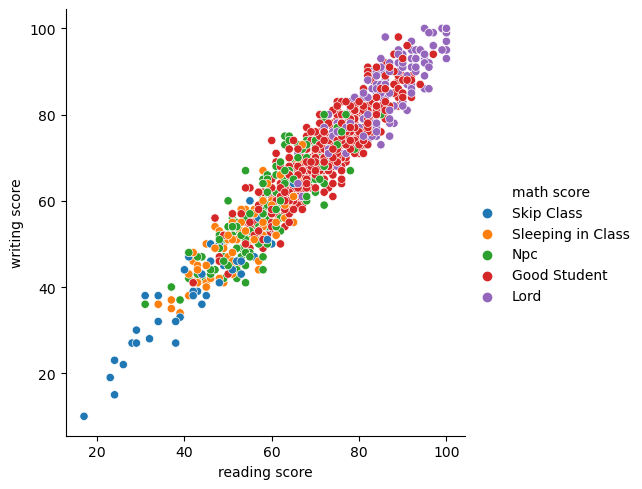

In [28]:
sns.relplot(x='reading score',y="writing score", hue="math score", data= data) #just to make it cool
#but its actually functional since we know that person who good at reading and writing are good at math

In [15]:
check_nan = data['math score'].isnull().values.any()
print (check_nan)
count_nan = data['math score'].isnull().sum() #check nan again in case there is some data in math score who doesnt get category format
print (count_nan)

False
0


In [19]:
X = data.drop('math score',axis=1)
y = data['math score'] #math score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y, test_size = 0.5, random_state = 0) #split the dataset

In [22]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [23]:
clf = svm.SVC()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

In [24]:
print(classification_report(y_test,pred))

                   precision    recall  f1-score   support

     Good Student       0.76      0.87      0.81       245
             Lord       0.84      0.70      0.76        92
              Npc       0.51      0.51      0.51        95
       Skip Class       0.93      0.59      0.72        22
Sleeping in Class       0.59      0.43      0.50        46

         accuracy                           0.72       500
        macro avg       0.72      0.62      0.66       500
     weighted avg       0.72      0.72      0.71       500



In [25]:
print(accuracy_score(y_test,pred)) #accuracy

0.716


In [26]:
a = [[0,3,0,1,1,60,90]] #women,group d,associate's degree, standard lunch, none preparation, 60 reading score, 90 writing score
a = s.transform(a)
b = clf.predict(a)

In [27]:
b

array(['Good Student'], dtype=object)